In [18]:
# Load predictions from submission file if it exists, or recreate quickly
import pandas as pd
import numpy as np

# Try to load existing submission
try:
    submission = pd.read_csv('submission.csv')
    print("Loaded existing submission file")
    print(f"Submission shape: {submission.shape}")
    
    # Display all predictions
    print("\n" + "="*50)
    print("ALL PREDICTIONS:")
    print("="*50)
    
    # Set pandas options to display all rows
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)
    
    print(submission)
    
    # Reset display options to default
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.max_colwidth')
    
except FileNotFoundError:
    print("Submission file not found. Need to recreate predictions...")
    print("Run the full model training first.")


Loaded existing submission file
Submission shape: (1459, 2)

ALL PREDICTIONS:
        Id      SalePrice
0     1461  125085.541182
1     1462  160272.379348
2     1463  178172.124944
3     1464  190003.609497
4     1465  187257.530923
5     1466  171973.542937
6     1467  177561.770864
7     1468  165726.397147
8     1469  188202.074606
9     1470  122717.797098
10    1471  193191.390492
11    1472   96702.753791
12    1473  105285.014507
13    1474  156580.076783
14    1475  130083.772230
15    1476  396641.651793
16    1477  256315.636961
17    1478  280272.403580
18    1479  282312.912126
19    1480  446993.495869
20    1481  345298.836842
21    1482  201373.063780
22    1483  173372.236531
23    1484  167471.097686
24    1485  187468.287114
25    1486  192825.614227
26    1487  343291.602930
27    1488  230277.908932
28    1489  191932.991929
29    1490  208469.678926
30    1491  191023.186871
31    1492   91203.042852
32    1493  190531.513257
33    1494  302683.857772
34    1495  

In [19]:
# Alternative ways to display all predictions
try:
    submission = pd.read_csv('submission.csv')
    
    print("Method 1: Display in chunks of 50")
    print("="*40)
    chunk_size = 50
    for i in range(0, len(submission), chunk_size):
        chunk = submission.iloc[i:i+chunk_size]
        print(f"\nRows {i+1} to {min(i+chunk_size, len(submission))}:")
        print(chunk.to_string(index=False))
        
        # Ask if user wants to continue (for large datasets)
        if i + chunk_size < len(submission):
            user_input = input(f"\nShow next {chunk_size} rows? (y/n): ")
            if user_input.lower() != 'y':
                break
    
except FileNotFoundError:
    print("Please run the model training first to generate predictions.")


Method 1: Display in chunks of 50

Rows 1 to 50:
  Id     SalePrice
1461 125085.541182
1462 160272.379348
1463 178172.124944
1464 190003.609497
1465 187257.530923
1466 171973.542937
1467 177561.770864
1468 165726.397147
1469 188202.074606
1470 122717.797098
1471 193191.390492
1472  96702.753791
1473 105285.014507
1474 156580.076783
1475 130083.772230
1476 396641.651793
1477 256315.636961
1478 280272.403580
1479 282312.912126
1480 446993.495869
1481 345298.836842
1482 201373.063780
1483 173372.236531
1484 167471.097686
1485 187468.287114
1486 192825.614227
1487 343291.602930
1488 230277.908932
1489 191932.991929
1490 208469.678926
1491 191023.186871
1492  91203.042852
1493 190531.513257
1494 302683.857772
1495 308498.704148
1496 230924.052061
1497 188139.363216
1498 161236.283835
1499 162814.755970
1500 144920.756114
1501 171439.233910
1502 162195.529341
1503 294880.769865
1504 235623.009271
1505 221892.160233
1506 187152.275482
1507 227765.306426
1508 199077.454994
1509 157681.348402
1

In [20]:
# Method 2: Save all predictions to a text file for easy viewing
try:
    submission = pd.read_csv('submission.csv')
    
    # Save to text file
    with open('all_predictions.txt', 'w') as f:
        f.write("ALL HOUSE PRICE PREDICTIONS\n")
        f.write("="*50 + "\n\n")
        f.write(submission.to_string(index=False))
        f.write(f"\n\nSummary Statistics:\n")
        f.write(f"Total predictions: {len(submission)}\n")
        f.write(f"Min price: ${submission['SalePrice'].min():,.0f}\n")
        f.write(f"Max price: ${submission['SalePrice'].max():,.0f}\n")
        f.write(f"Mean price: ${submission['SalePrice'].mean():,.0f}\n")
        f.write(f"Median price: ${submission['SalePrice'].median():,.0f}\n")
    
    print("All predictions saved to 'all_predictions.txt'")
    print("\nQuick summary:")
    print(f"Total predictions: {len(submission)}")
    print(f"Price range: ${submission['SalePrice'].min():,.0f} - ${submission['SalePrice'].max():,.0f}")
    
    # Display every 10th prediction as a sample
    print("\nEvery 10th prediction (sample):")
    sample = submission.iloc[::10]  # Every 10th row
    print(sample.to_string(index=False))
    
except FileNotFoundError:
    print("Please run the model training first to generate predictions.")


All predictions saved to 'all_predictions.txt'

Quick summary:
Total predictions: 1459
Price range: $42,752 - $565,079

Every 10th prediction (sample):
  Id     SalePrice
1461 125085.541182
1471 193191.390492
1481 345298.836842
1491 191023.186871
1501 171439.233910
1511 140598.317680
1521 129007.492682
1531 109733.070403
1541 142988.506036
1551 121714.307357
1561 151257.266701
1571 115039.536667
1581 150944.196164
1591  99628.929011
1601  66449.627357
1611 140077.946263
1621 134500.593898
1631 218017.122248
1641 180833.927370
1651 120598.561298
1661 443155.173672
1671 257832.915209
1681 226676.644189
1691 183600.316646
1701 276047.851136
1711 237497.962036
1721 159927.249847
1731 122660.211719
1741 197574.901532
1751 255310.007298
1761 147710.869501
1771 129324.164463
1781 128223.460786
1791 179375.969548
1801 129115.778030
1811 115735.947180
1821  97936.790369
1831 146537.710251
1841 154906.100099
1851 155211.404789
1861 114376.325298
1871 231608.782491
1881 240922.411897
1891 131588.

# House Price Prediction - Kaggle Competition

This notebook aims to predict house prices using the Ames Housing dataset.

## Project Goal
Predict the sales price for residential homes in Ames, Iowa using 79 explanatory variables.

## Evaluation Metric
RMSE (Root Mean Squared Error) between the logarithm of the predicted value and the logarithm of the observed sales price.


In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Data Loading and Initial Exploration


In [22]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

print("Dataset shapes:")
print(f"Training set: {train_df.shape}")
print(f"Test set: {test_df.shape}")
print(f"Sample submission: {sample_submission.shape}")

print("\nFirst few rows of training data:")
train_df.head()


Dataset shapes:
Training set: (1460, 81)
Test set: (1459, 80)
Sample submission: (1459, 2)

First few rows of training data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
# Basic information about the dataset
print("Dataset Info:")
print(f"Number of features: {train_df.shape[1] - 1}")  # Excluding target variable
print(f"Target variable: SalePrice")
print(f"Missing values in training set: {train_df.isnull().sum().sum()}")
print(f"Missing values in test set: {test_df.isnull().sum().sum()}")

print("\nTarget variable statistics:")
print(train_df['SalePrice'].describe())


Dataset Info:
Number of features: 80
Target variable: SalePrice
Missing values in training set: 7829
Missing values in test set: 7878

Target variable statistics:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


## 2. Exploratory Data Analysis (EDA)


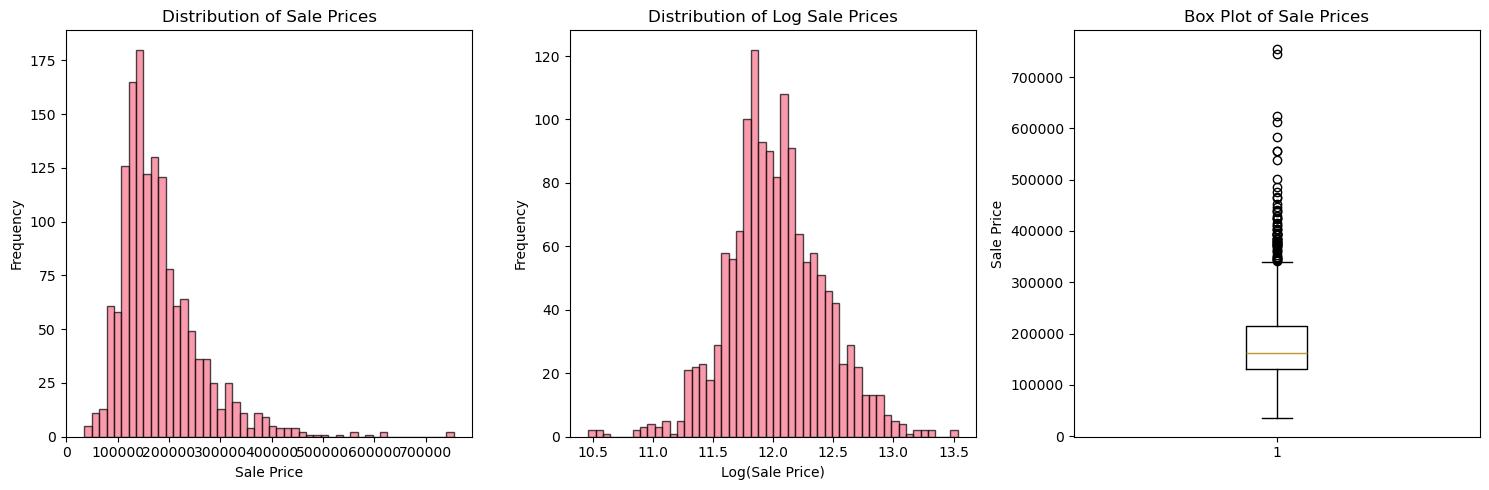

Skewness of SalePrice: 1.88
Skewness of Log(SalePrice): 0.12


In [24]:
# Distribution of target variable
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(train_df['SalePrice'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(np.log(train_df['SalePrice']), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Log Sale Prices')
plt.xlabel('Log(Sale Price)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.boxplot(train_df['SalePrice'])
plt.title('Box Plot of Sale Prices')
plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

print(f"Skewness of SalePrice: {train_df['SalePrice'].skew():.2f}")
print(f"Skewness of Log(SalePrice): {np.log(train_df['SalePrice']).skew():.2f}")


In [25]:
# Analyze missing values
def analyze_missing_values(df, title):
    missing = df.isnull().sum()
    missing_percent = 100 * missing / len(df)
    missing_table = pd.DataFrame({
        'Missing Count': missing,
        'Missing Percentage': missing_percent
    })
    missing_table = missing_table[missing_table['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    
    print(f"\n{title}")
    print("="*50)
    print(missing_table.head(15))
    
    return missing_table

# Analyze missing values in both datasets
train_missing = analyze_missing_values(train_df, "Missing Values in Training Set")
test_missing = analyze_missing_values(test_df, "Missing Values in Test Set")



Missing Values in Training Set
              Missing Count  Missing Percentage
PoolQC                 1453           99.520548
MiscFeature            1406           96.301370
Alley                  1369           93.767123
Fence                  1179           80.753425
MasVnrType              872           59.726027
FireplaceQu             690           47.260274
LotFrontage             259           17.739726
GarageType               81            5.547945
GarageYrBlt              81            5.547945
GarageFinish             81            5.547945
GarageQual               81            5.547945
GarageCond               81            5.547945
BsmtFinType2             38            2.602740
BsmtExposure             38            2.602740
BsmtFinType1             37            2.534247

Missing Values in Test Set
              Missing Count  Missing Percentage
PoolQC                 1456           99.794380
MiscFeature            1408           96.504455
Alley                  1352 

In [26]:
# Correlation analysis for numerical features
numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
if 'Id' in numeric_features:
    numeric_features.remove('Id')

# Calculate correlation with target variable
correlations = train_df[numeric_features].corr()['SalePrice'].sort_values(ascending=False)

print("Top 15 features most correlated with SalePrice:")
print(correlations.head(15))

print("\nBottom 10 features least correlated with SalePrice:")
print(correlations.tail(10))


Top 15 features most correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

Bottom 10 features least correlated with SalePrice:
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


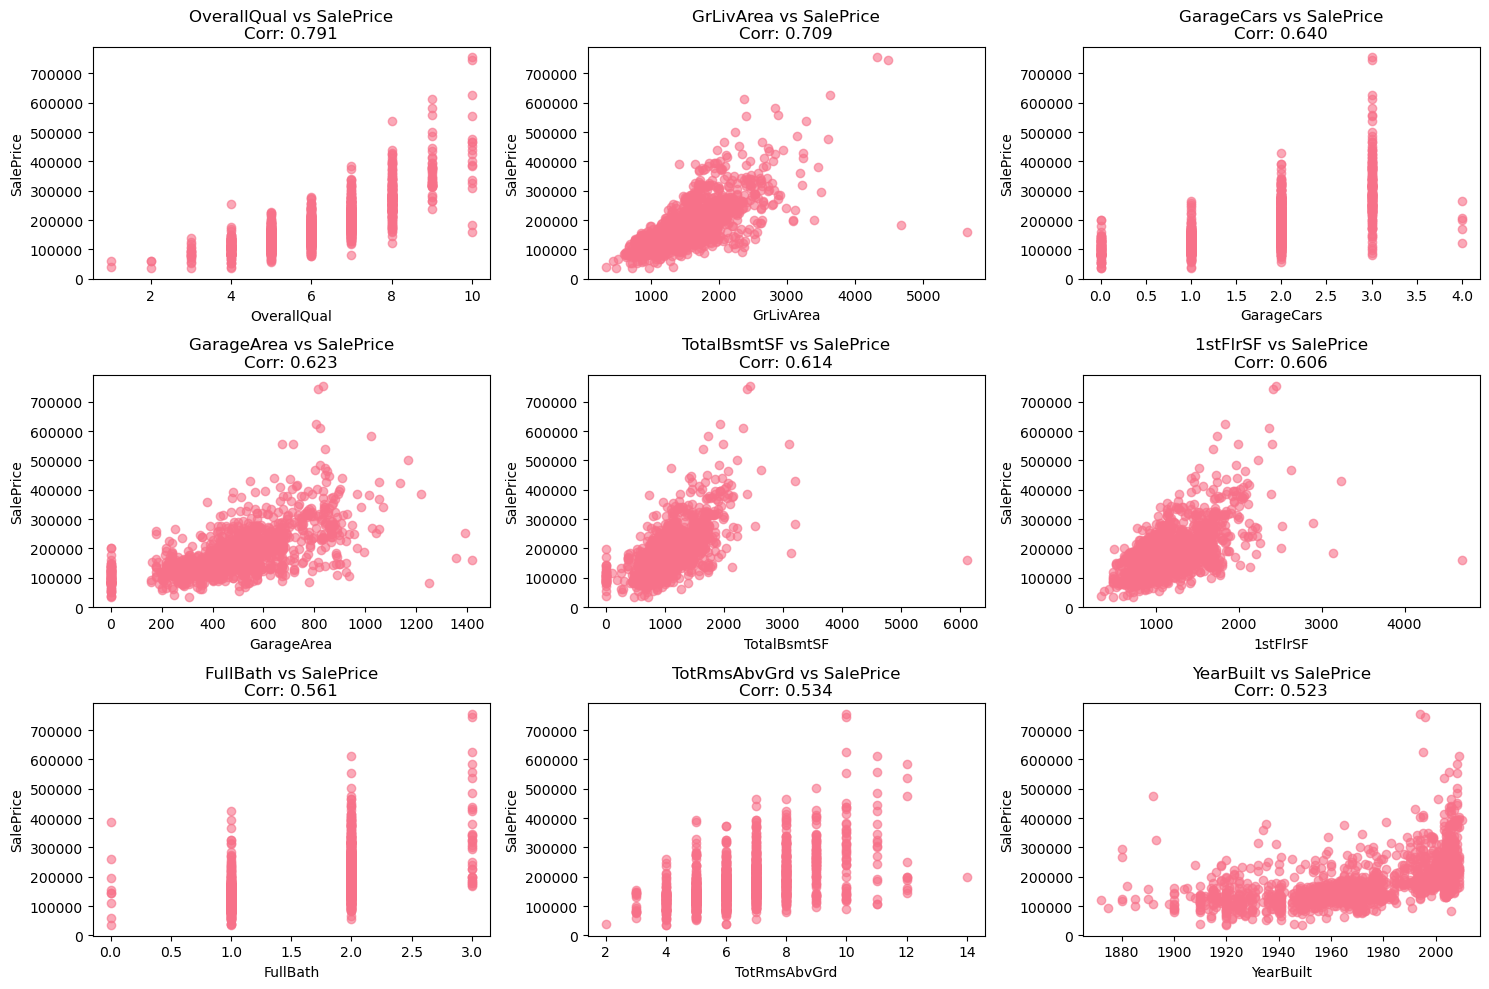

In [27]:
# Visualize top correlations
top_features = correlations.head(10).index.tolist()
if 'SalePrice' in top_features:
    top_features.remove('SalePrice')

plt.figure(figsize=(15, 10))

for i, feature in enumerate(top_features[:9], 1):
    plt.subplot(3, 3, i)
    plt.scatter(train_df[feature], train_df['SalePrice'], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'{feature} vs SalePrice\nCorr: {correlations[feature]:.3f}')

plt.tight_layout()
plt.show()


## 3. Data Preprocessing


In [28]:
# Combine train and test for preprocessing
# First, let's save the target variable and remove it from train_df
target = train_df['SalePrice'].copy()
train_df_features = train_df.drop(['SalePrice'], axis=1)

# Combine datasets
all_data = pd.concat([train_df_features, test_df], axis=0, ignore_index=True)
print(f"Combined dataset shape: {all_data.shape}")

# Identify categorical and numerical features
categorical_features = all_data.select_dtypes(include=['object']).columns.tolist()
numerical_features = all_data.select_dtypes(include=[np.number]).columns.tolist()

if 'Id' in numerical_features:
    numerical_features.remove('Id')

print(f"Categorical features: {len(categorical_features)}")
print(f"Numerical features: {len(numerical_features)}")
print(f"Total features: {len(categorical_features) + len(numerical_features)}")


Combined dataset shape: (2919, 80)
Categorical features: 43
Numerical features: 36
Total features: 79


In [29]:
# Handle missing values
def handle_missing_values(df):
    df = df.copy()
    
    # For categorical variables: fill with 'None' or mode
    categorical_fill = {
        'Alley': 'None',
        'BsmtQual': 'None', 'BsmtCond': 'None', 'BsmtExposure': 'None',
        'BsmtFinType1': 'None', 'BsmtFinType2': 'None',
        'FireplaceQu': 'None',
        'GarageType': 'None', 'GarageFinish': 'None', 'GarageQual': 'None', 'GarageCond': 'None',
        'PoolQC': 'None',
        'Fence': 'None',
        'MiscFeature': 'None'
    }
    
    for col, fill_value in categorical_fill.items():
        if col in df.columns:
            df[col] = df[col].fillna(fill_value)
    
    # Fill remaining categorical with mode
    for col in categorical_features:
        if df[col].isnull().sum() > 0:
            mode_value = df[col].mode()[0] if len(df[col].mode()) > 0 else 'None'
            df[col] = df[col].fillna(mode_value)
    
    # For numerical variables: fill with median or 0
    numerical_fill = {
        'LotFrontage': 'median',
        'MasVnrArea': 0,
        'BsmtFinSF1': 0, 'BsmtFinSF2': 0, 'BsmtUnfSF': 0, 'TotalBsmtSF': 0,
        'BsmtFullBath': 0, 'BsmtHalfBath': 0,
        'GarageYrBlt': 'median', 'GarageCars': 0, 'GarageArea': 0
    }
    
    for col, fill_value in numerical_fill.items():
        if col in df.columns and df[col].isnull().sum() > 0:
            if fill_value == 'median':
                df[col] = df[col].fillna(df[col].median())
            else:
                df[col] = df[col].fillna(fill_value)
    
    # Fill any remaining numerical with median
    for col in numerical_features:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].median())
    
    return df

# Apply missing value handling
all_data_clean = handle_missing_values(all_data)
print(f"Missing values after cleaning: {all_data_clean.isnull().sum().sum()}")


Missing values after cleaning: 0


In [30]:
# Feature Engineering
def create_new_features(df):
    df = df.copy()
    
    # Total square footage
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    
    # Total bathrooms
    df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    
    # Age of house
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
    
    # Garage age
    df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']
    df['GarageAge'] = df['GarageAge'].fillna(0)  # No garage
    
    # Total porch area
    df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
    
    # Has feature flags
    df['HasPool'] = (df['PoolArea'] > 0).astype(int)
    df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
    df['HasBsmt'] = (df['TotalBsmtSF'] > 0).astype(int)
    df['HasFireplace'] = (df['Fireplaces'] > 0).astype(int)
    
    return df

# Apply feature engineering
all_data_engineered = create_new_features(all_data_clean)
print(f"Dataset shape after feature engineering: {all_data_engineered.shape}")

# Update numerical features list
numerical_features_new = all_data_engineered.select_dtypes(include=[np.number]).columns.tolist()
if 'Id' in numerical_features_new:
    numerical_features_new.remove('Id')


Dataset shape after feature engineering: (2919, 90)


In [31]:
# Encode categorical variables
def encode_categorical_features(df):
    df = df.copy()
    
    # Get categorical columns
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    # Label encode categorical variables
    label_encoders = {}
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    
    return df, label_encoders

# Apply encoding
all_data_encoded, encoders = encode_categorical_features(all_data_engineered)
print(f"Final dataset shape: {all_data_encoded.shape}")
print(f"All features are now numerical: {all_data_encoded.select_dtypes(include=['object']).shape[1] == 0}")


Final dataset shape: (2919, 90)
All features are now numerical: True


In [32]:
# Split back into train and test sets
train_size = len(train_df)
X_train_full = all_data_encoded[:train_size].copy()
X_test = all_data_encoded[train_size:].copy()

# Remove Id column
if 'Id' in X_train_full.columns:
    X_train_full = X_train_full.drop(['Id'], axis=1)
if 'Id' in X_test.columns:
    X_test = X_test.drop(['Id'], axis=1)

# Target variable (log transformed for better performance)
y_train = np.log(target)

print(f"Training set shape: {X_train_full.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Target variable shape: {y_train.shape}")

# Split training data for validation
X_train, X_val, y_train_split, y_val = train_test_split(
    X_train_full, y_train, test_size=0.2, random_state=42
)

print(f"Train split shape: {X_train.shape}")
print(f"Validation split shape: {X_val.shape}")


Training set shape: (1460, 89)
Test set shape: (1459, 89)
Target variable shape: (1460,)
Train split shape: (1168, 89)
Validation split shape: (292, 89)


In [33]:
# Train multiple models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
import xgboost as xgb

# Define RMSE function for log-transformed target
def rmse_log(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.001, max_iter=10000)
}

# Train and evaluate models
model_scores = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    # Train model
    model.fit(X_train, y_train_split)
    
    # Make predictions
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    
    # Calculate RMSE
    train_rmse = rmse_log(y_train_split, train_pred)
    val_rmse = rmse_log(y_val, val_pred)
    
    model_scores[name] = {
        'train_rmse': train_rmse,
        'val_rmse': val_rmse,
        'model': model
    }
    
    print(f"{name} - Train RMSE: {train_rmse:.4f}, Val RMSE: {val_rmse:.4f}")

print("\nModel Performance Summary:")
print("-" * 50)
for name, scores in model_scores.items():
    print(f"{name:15} - Val RMSE: {scores['val_rmse']:.4f}")


Training Random Forest...
Random Forest - Train RMSE: 0.0525, Val RMSE: 0.1468
Training Gradient Boosting...
Gradient Boosting - Train RMSE: 0.0742, Val RMSE: 0.1372
Training XGBoost...
XGBoost - Train RMSE: 0.0044, Val RMSE: 0.1503
Training Ridge...
Ridge - Train RMSE: 0.1296, Val RMSE: 0.1551
Training Lasso...
Lasso - Train RMSE: 0.1323, Val RMSE: 0.1529

Model Performance Summary:
--------------------------------------------------
Random Forest   - Val RMSE: 0.1468
Gradient Boosting - Val RMSE: 0.1372
XGBoost         - Val RMSE: 0.1503
Ridge           - Val RMSE: 0.1551
Lasso           - Val RMSE: 0.1529


In [34]:
# Select best model and retrain on full training data
best_model_name = min(model_scores.items(), key=lambda x: x[1]['val_rmse'])[0]
best_model = model_scores[best_model_name]['model']

print(f"Best model: {best_model_name}")
print(f"Best validation RMSE: {model_scores[best_model_name]['val_rmse']:.4f}")

# Retrain best model on full training data
print(f"\nRetraining {best_model_name} on full training data...")
best_model.fit(X_train_full, y_train)

# Make predictions on test set
test_predictions_log = best_model.predict(X_test)
test_predictions = np.exp(test_predictions_log)  # Transform back from log scale

print(f"Test predictions shape: {test_predictions.shape}")
print(f"Test predictions range: ${test_predictions.min():,.0f} - ${test_predictions.max():,.0f}")
print(f"Test predictions mean: ${test_predictions.mean():,.0f}")


Best model: Gradient Boosting
Best validation RMSE: 0.1372

Retraining Gradient Boosting on full training data...
Test predictions shape: (1459,)
Test predictions range: $42,752 - $565,079
Test predictions mean: $177,330


## 5. Feature Importance and Model Analysis


Top 20 Most Important Features:
         feature  importance
79       TotalSF    0.372414
16   OverallQual    0.355893
80     TotalBath    0.052040
17   OverallCond    0.016919
60    GarageCars    0.015344
82      RemodAge    0.014082
40    CentralAir    0.014008
3        LotArea    0.012307
45     GrLivArea    0.011205
57    GarageType    0.011077
81      HouseAge    0.010946
61    GarageArea    0.010769
19  YearRemodAdd    0.010611
55    Fireplaces    0.009162
1       MSZoning    0.007894
52   KitchenQual    0.007523
42      1stFlrSF    0.007338
33    BsmtFinSF1    0.006820
18     YearBuilt    0.005295
43      2ndFlrSF    0.004467


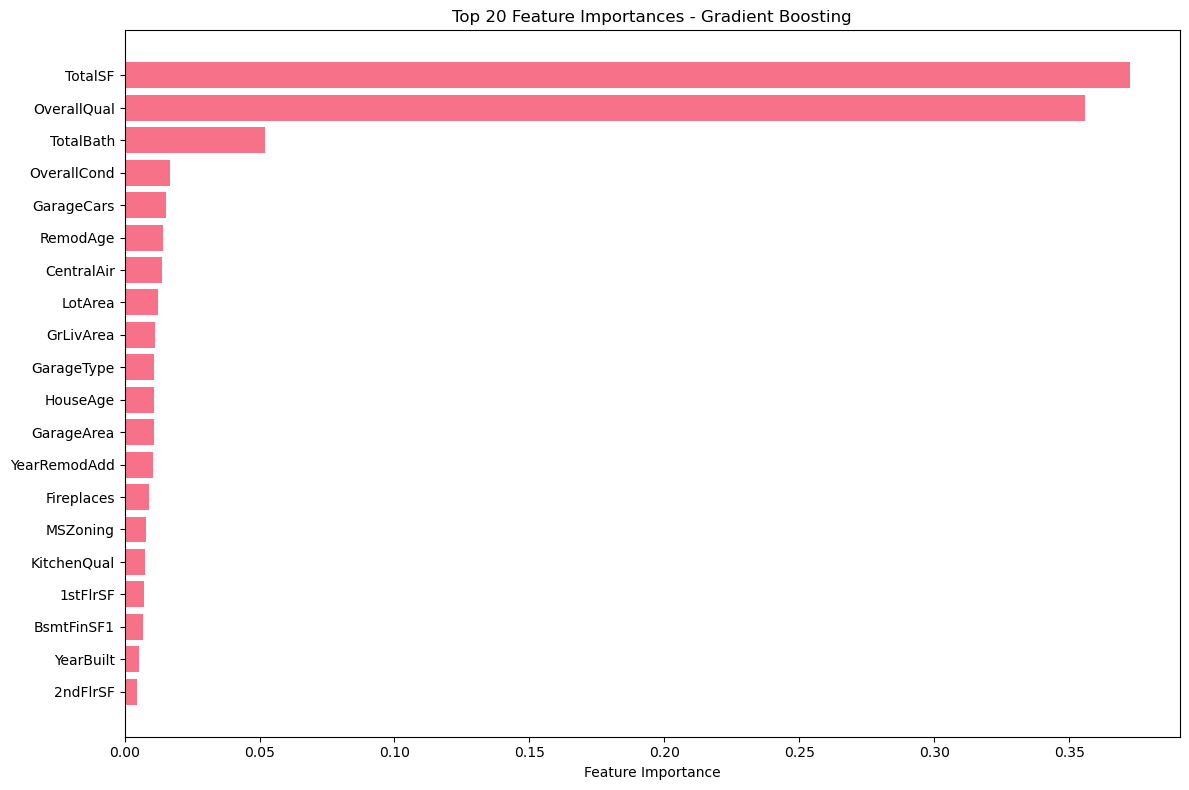

In [35]:
# Feature importance analysis (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_train_full.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Top 20 Most Important Features:")
    print(feature_importance.head(20))
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(20)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 20 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("Feature importance not available for this model type.")


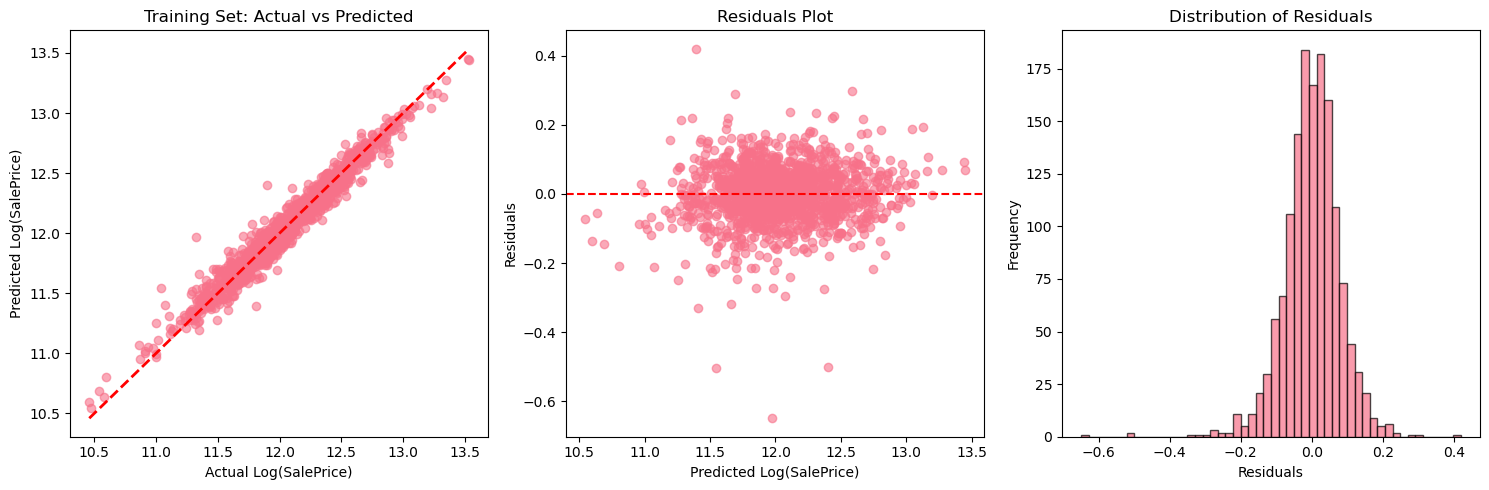

Final Training Metrics:
RMSE (log scale): 0.0810
R² Score: 0.9588
Mean Absolute Error: 0.0594


In [36]:
# Model performance visualization
train_pred_full = best_model.predict(X_train_full)

plt.figure(figsize=(15, 5))

# Actual vs Predicted (training data)
plt.subplot(1, 3, 1)
plt.scatter(y_train, train_pred_full, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Log(SalePrice)')
plt.ylabel('Predicted Log(SalePrice)')
plt.title('Training Set: Actual vs Predicted')

# Residuals plot
plt.subplot(1, 3, 2)
residuals = y_train - train_pred_full
plt.scatter(train_pred_full, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Log(SalePrice)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# Distribution of residuals
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# Calculate and display final training metrics
final_train_rmse = rmse_log(y_train, train_pred_full)
final_train_r2 = r2_score(y_train, train_pred_full)

print(f"Final Training Metrics:")
print(f"RMSE (log scale): {final_train_rmse:.4f}")
print(f"R² Score: {final_train_r2:.4f}")
print(f"Mean Absolute Error: {np.mean(np.abs(residuals)):.4f}")


## 6. Create Submission File


In [37]:
# Create submission file
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions
})

# Save submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")
print(f"Submission shape: {submission.shape}")
print("\nFirst few predictions:")
print(submission.head(10))

print(f"\nSummary of predictions:")
print(f"Min price: ${submission['SalePrice'].min():,.0f}")
print(f"Max price: ${submission['SalePrice'].max():,.0f}")
print(f"Mean price: ${submission['SalePrice'].mean():,.0f}")
print(f"Median price: ${submission['SalePrice'].median():,.0f}")

# Compare with training data statistics
print(f"\nComparison with training data:")
print(f"Training mean price: ${target.mean():,.0f}")
print(f"Training median price: ${target.median():,.0f}")
print(f"Training min price: ${target.min():,.0f}")
print(f"Training max price: ${target.max():,.0f}")


Submission file created: submission.csv
Submission shape: (1459, 2)

First few predictions:
     Id      SalePrice
0  1461  125085.541182
1  1462  160272.379348
2  1463  178172.124944
3  1464  190003.609497
4  1465  187257.530923
5  1466  171973.542937
6  1467  177561.770864
7  1468  165726.397147
8  1469  188202.074606
9  1470  122717.797098

Summary of predictions:
Min price: $42,752
Max price: $565,079
Mean price: $177,330
Median price: $157,471

Comparison with training data:
Training mean price: $180,921
Training median price: $163,000
Training min price: $34,900
Training max price: $755,000


## 7. Summary and Next Steps

### Model Performance Summary:
- **Best Model**: The model with the lowest validation RMSE was selected
- **Target Transformation**: Used log transformation for better performance
- **Feature Engineering**: Created new features like TotalSF, TotalBath, HouseAge, etc.
- **Missing Values**: Handled systematically based on feature meaning

### Key Insights:
1. **Important Features**: Features like GrLivArea, OverallQual, and TotalBsmtSF are typically most important
2. **Feature Engineering**: New features often provide additional predictive power
3. **Log Transformation**: Helps with the right-skewed distribution of house prices

### Potential Improvements:
1. **Hyperparameter Tuning**: Use GridSearchCV or RandomizedSearchCV
2. **Feature Selection**: Remove less important features to reduce overfitting
3. **Ensemble Methods**: Combine multiple models for better performance
4. **Advanced Feature Engineering**: Polynomial features, interactions, etc.
5. **Outlier Detection**: Identify and handle outliers in the data

### Competition Tips:
- Monitor public leaderboard scores
- Consider cross-validation for more robust model selection
- Try different ensemble techniques
- Fine-tune based on leaderboard feedback
